## Plotting for the SoftwareX paper

### Action shifts

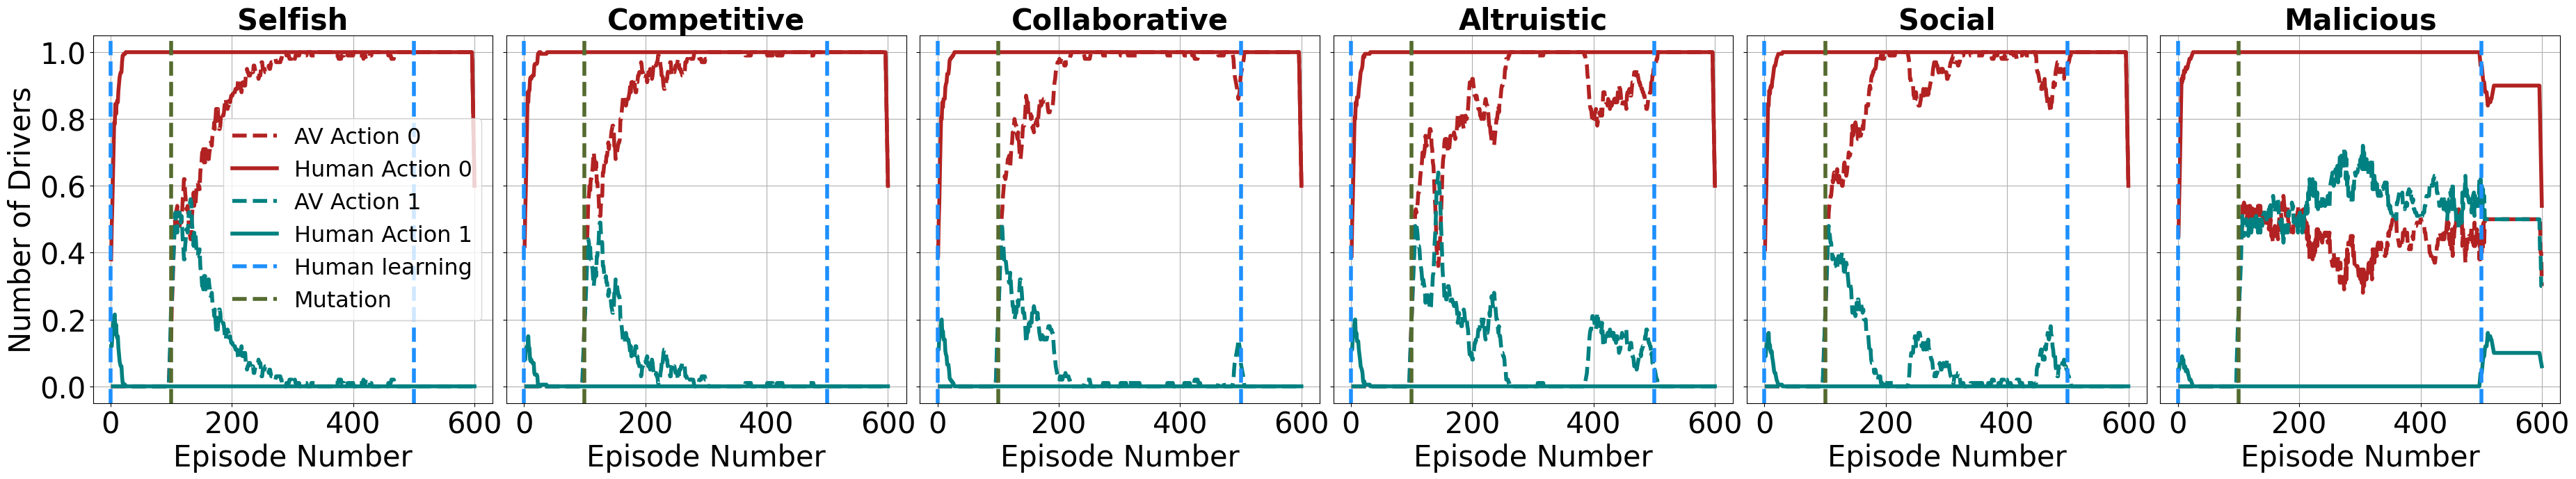

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of directories containing the CSV files
directories = [
    "training_records_selfish_human_learning/episodes",
    "training_records_competitive_human_learning/episodes",
    "training_records_collaborative_human_learning/episodes",
    "training_records_altruistic_human_learning/episodes",
    "training_records_social_human_learning/episodes",
    "training_records_malicious_human_learning/episodes"
]  # Replace with actual folder paths

# Custom titles for each plot
titles = [
    "Selfish",
    "Competitive",
    "Collaborative",
    "Altruistic",
    "Social",
    "Malicious"
]

# Function to process CSV files and return dataframes for AV and Human
def process_csv_files(directory):
    # Get a sorted list of all CSV files in arithmetic (numerical) order
    csv_files = sorted(
        [file for file in os.listdir(directory) if file.endswith('.csv')],
        key=lambda x: int(''.join(filter(str.isdigit, os.path.splitext(x)[0]))))
    
    # Initialize dictionaries to store action proportions for AV and Human
    action_proportions = {
        "AV": [],
        "Human": []
    }
    
    # Process each CSV file
    file_numbers = []
    for csv_file in csv_files:
        # Extract the numeric part for the x-axis
        file_number = int(''.join(filter(str.isdigit, os.path.splitext(csv_file)[0])))
        file_numbers.append(file_number)
        
        # Read the CSV file
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)
        
        # Calculate proportions for each group
        av_actions = df[df["kind"] == "AV"]["action"].value_counts(normalize=True).sort_index()
        human_actions = df[df["kind"] == "Human"]["action"].value_counts(normalize=True).sort_index()
        
        # Store the proportions, filling missing actions with 0
        action_proportions["AV"].append(av_actions)
        action_proportions["Human"].append(human_actions)
    
    # Combine all proportions into DataFrames, ensuring consistent columns
    all_actions = set().union(*[df.index for df in action_proportions["AV"]]).union(
        *[df.index for df in action_proportions["Human"]]
    )
    all_actions = sorted(all_actions)
    av_df = pd.DataFrame(action_proportions["AV"], columns=all_actions).fillna(0)
    human_df = pd.DataFrame(action_proportions["Human"], columns=all_actions).fillna(0)
    
    return file_numbers, av_df, human_df

# Function to plot data for a single directory
def plot_data(ax, file_numbers, av_df, human_df, title, show_legend, show_ylabel):
    # Custom color mapping for actions
    action_colors = {0: "firebrick", 1: "teal"}
    # Line style mapping for agent types
    linestyles = {"AV": "dashed", "Human": "solid"}
    
    # Smooth data using a moving average
    def smooth_data(data, window_size=10):
        return np.convolve(data, np.ones(window_size) / window_size, mode='same')
    
    # Plot data for each action with thicker lines
    for action in av_df.columns:
        smoothed_av = smooth_data(av_df[action], window_size=10)
        smoothed_human = smooth_data(human_df[action], window_size=10)
        
        # Plot AV lines
        ax.plot(
            file_numbers,
            smoothed_av,
            label=f'AV Action {action}',
            linestyle=linestyles["AV"],
            color=action_colors[int(action)],
            linewidth=4  # Thicker lines
        )
        
        # Plot Human lines
        ax.plot(
            file_numbers,
            smoothed_human,
            label=f'Human Action {action}',
            linestyle=linestyles["Human"],
            color=action_colors[int(action)],
            linewidth=4  # Thicker lines
        )
    
    # Add vertical dashed lines at timesteps 200 and 500
    ax.axvline(
        x=0,
        color="dodgerblue",
        linestyle="--",  # Dashed line
        linewidth=4,
        label="Human learning"
    )
    ax.axvline(
        x=100,
        color="darkolivegreen",
        linestyle="--",  # Dashed line
        linewidth=4,
        label="Mutation"
    )
    ax.axvline(
        x=500,
        color="dodgerblue",
        linestyle="--",  # Dashed line
        linewidth=4,
    )
    
    # Increase font sizes
    ax.set_title(title, fontsize=30, weight='bold')  # Bold title
    ax.set_xlabel("Episode Number", fontsize=30)
    if show_ylabel:
        ax.set_ylabel("Number of Drivers", fontsize=30)
    if show_legend:
        ax.legend(fontsize=23)
    ax.tick_params(axis='both', labelsize=30)
    ax.grid()

# Create a figure with six subplots arranged side by side
fig, axes = plt.subplots(1, 6, figsize=(37, 7), sharey=True)

# Process each folder and plot its data
for i, directory in enumerate(directories):
    file_numbers, av_df, human_df = process_csv_files(directory)
    # Show the legend and y-axis label only in the first plot
    plot_data(axes[i], file_numbers, av_df, human_df, title=titles[i], show_legend=(i == 0), show_ylabel=(i == 0))

# Adjust layout
plt.tight_layout() 
plt.show()

### Average reward

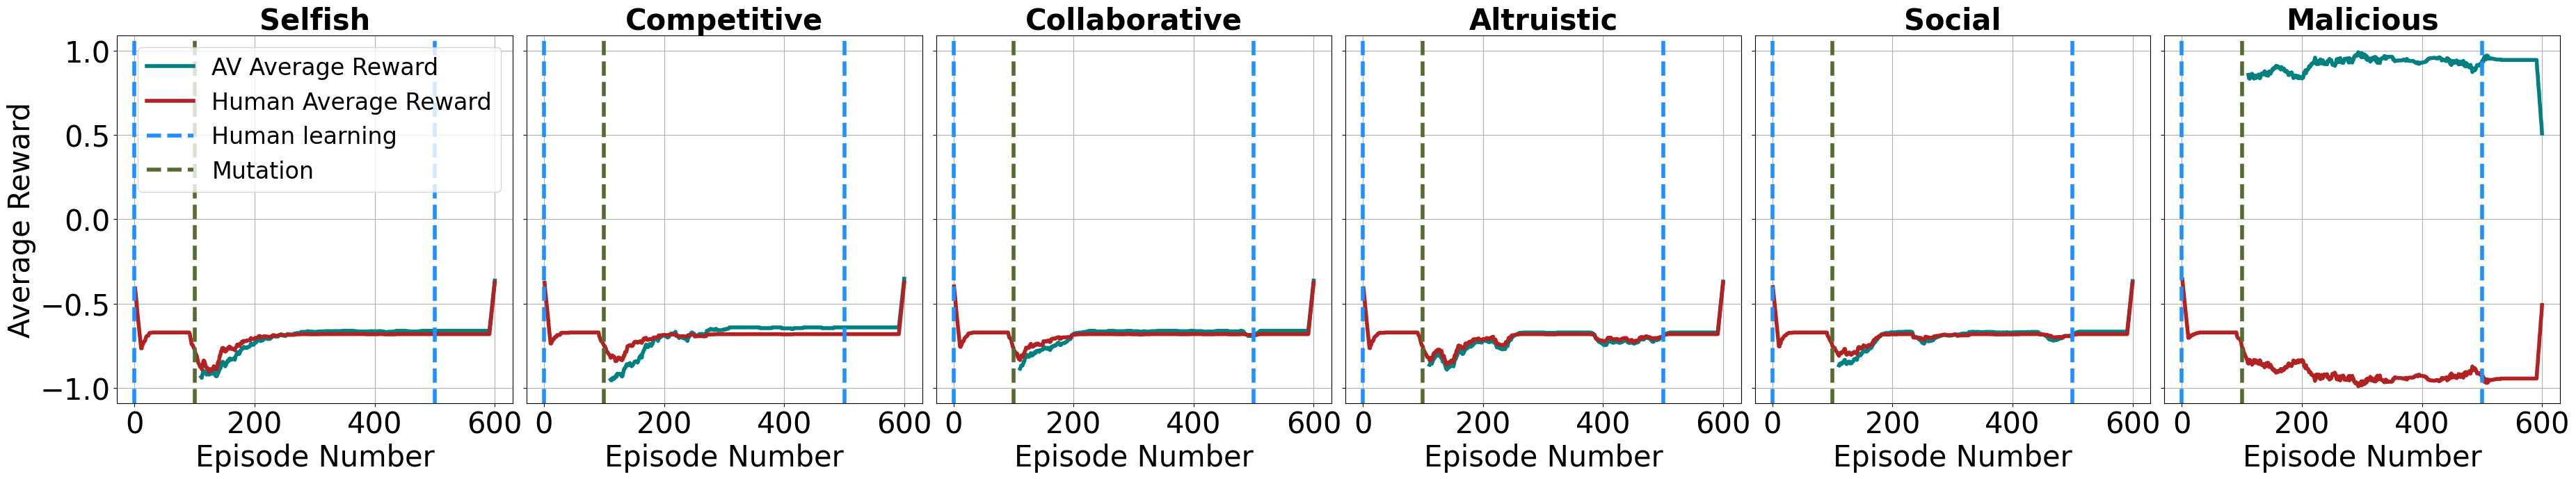

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of directories containing the CSV files
directories = [
    "training_records_selfish_human_learning/episodes",
    "training_records_competitive_human_learning/episodes",
    "training_records_collaborative_human_learning/episodes",
    "training_records_altruistic_human_learning/episodes",
    "training_records_social_human_learning/episodes",
    "training_records_malicious_human_learning/episodes"
]  # Replace with actual folder paths

# Custom titles for each plot
titles = [
    "Selfish",
    "Competitive",
    "Collaborative",
    "Altruistic",
    "Social",
    "Malicious"
]

# Function to process CSV files and return average rewards for AV and Human
def process_csv_files(directory):
    # Get a sorted list of all CSV files in arithmetic (numerical) order
    csv_files = sorted(
        [file for file in os.listdir(directory) if file.endswith('.csv')],
        key=lambda x: int(''.join(filter(str.isdigit, os.path.splitext(x)[0])))
    )
    
    # Initialize lists to store average rewards
    av_rewards = []
    human_rewards = []
    file_numbers = []
    
    # Process each CSV file
    for csv_file in csv_files:
        # Extract the numeric part for the x-axis
        file_number = int(''.join(filter(str.isdigit, os.path.splitext(csv_file)[0])))
        file_numbers.append(file_number)
        
        # Read the CSV file
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)
        
        # Calculate average rewards for AV and Human
        av_avg_reward = df[df["kind"] == "AV"]["reward"].mean()
        human_avg_reward = df[df["kind"] == "Human"]["reward"].mean()
        
        # Append results
        av_rewards.append(av_avg_reward)
        human_rewards.append(human_avg_reward)
    
    return file_numbers, av_rewards, human_rewards

# Function to plot data for a single directory
def plot_data(ax, file_numbers, av_rewards, human_rewards, title, show_legend, show_ylabel):
    # Line style and color mapping
    colors = {"AV": "teal", "Human": "firebrick"}
    linestyles = {"AV": "solid", "Human": "solid"}
    
    # Smooth data using a moving average
    def smooth_data(data, window_size=0):
        return np.convolve(data, np.ones(window_size) / window_size, mode='same')
    
    # Plot smoothed average rewards
    smoothed_av_rewards = smooth_data(av_rewards, window_size=20)
    smoothed_human_rewards = smooth_data(human_rewards, window_size=20)
    
    # Plot AV rewards
    ax.plot(
        file_numbers,
        smoothed_av_rewards,
        label="AV Average Reward",
        linestyle=linestyles["AV"],
        color=colors["AV"],
        linewidth=4
    )
    
    # Plot Human rewards
    ax.plot(
        file_numbers,
        smoothed_human_rewards,
        label="Human Average Reward",
        linestyle=linestyles["Human"],
        color=colors["Human"],
        linewidth=4
    )
    
    # Add vertical dashed lines at timesteps 0, 100, and 500
    ax.axvline(
        x=0,
        color="dodgerblue",
        linestyle="--",  # Dashed line
        linewidth=4,
        label="Human learning"
    )
    ax.axvline(
        x=100,
        color="darkolivegreen",
        linestyle="--",  # Dashed line
        linewidth=4,
        label="Mutation"
    )
    ax.axvline(
        x=500,
        color="dodgerblue",
        linestyle="--",  # Dashed line
        linewidth=4,
    )
    
    # Increase font sizes
    ax.set_title(title, fontsize=30, weight='bold')
    ax.set_xlabel("Episode Number", fontsize=30)
    if show_ylabel:
        ax.set_ylabel("Average Reward", fontsize=30)
    if show_legend:
        ax.legend(fontsize=24)
    ax.tick_params(axis='both', labelsize=30)
    ax.grid()

# Create a figure with six subplots arranged side by side
fig, axes = plt.subplots(1, 6, figsize=(37, 7), sharey=True)

# Process each folder and plot its data
for i, directory in enumerate(directories):
    file_numbers, av_rewards, human_rewards = process_csv_files(directory)
    # Show the legend and y-axis label only in the first plot
    plot_data(axes[i], file_numbers, av_rewards, human_rewards, title=titles[i], show_legend=(i == 0), show_ylabel=(i == 0))

# Adjust layout
plt.tight_layout() 
plt.show()